# Unlocking Revenue: Analyzing Profitable App Profiles in App Store

Our aim in this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. Consequently, the success of our apps is heavily dependent on the number of users, as higher user engagement leads to increased ad visibility and interaction, ultimately driving our revenue.

The primary goal of this project is to analyze data from the Google Play and App Store markets to identify trends and characteristics of successful apps. By understanding the key factors that contribute to higher user engagement, we aim to provide valuable insights to our developers. This knowledge will guide them in creating apps that are more likely to attract a larger user base, thus enhancing the company's overall profitability.

## Review about the dataset 

*A dataset containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018. [link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv).*

*A dataset containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017. [link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv).*

Let's start by opening the two data sets

In [2]:
from csv import reader

open_app_store=open('AppleStore.csv')
read_app=reader(open_app_store)
ios =list(read_app)
ios_header= ios[0]
ios_data = ios[1:]


open_google_play=open('googleplaystore.csv')
read_gg=reader(open_google_play)
android =list(read_gg)
android_header = android[0]
android_data = android[1:]


Create an explore_data which helps print a few rows of the datasets:

In [3]:
def explore_data(dataset, start, end, rows_and_columns=True):
    data_slice=dataset[start:end]
    for row in data_slice:
        print(row)
        print('\n') 
    if rows_and_columns:
              print('Number of rows:',len(dataset))
              print('Number of colums:',len(dataset[0]))             

In [ ]:
explore_data(ios_data, 0, 2, True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7197
Number of colums: 16


We can see that IOS store has 7197 apps and 16 colums. The most interesting columns can be: track_name, price,  rating_count_tot, user_rating, cont_rating, prime_genre, size_bytes, 

In [5]:
explore_data(android_data,0,2,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Number of rows: 10841
Number of colums: 13


Google store has 10841 apps and 13 rows. Relative columns that helps us to investigate the picture is: App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Android Ver. 

## Remove Wrong Data

The Google Play data set has a dedicated discussion section, and we can see that one of the discussions outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [6]:
print(android_data[10472])
print('\n')
print(android_header)
print('\n')
print(android_data[0])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the discussions section, this problem is caused by a missing value in the 'Category' column). As a consequence, we'll delete this row.

In [7]:
print(len(android_data))
del android_data[10472]    # don't run this more than once
print(len(android_data))
print(android_data[10472])

10841
10840
['osmino Wi-Fi: free WiFi', 'TOOLS', '4.2', '134203', '4.1M', '10,000,000+', 'Free', '0', 'Everyone', 'Tools', 'August 7, 2018', '6.06.14', '4.4 and up']


## Remove Duplicate Entries
### Part One

If we explore the Google Play data set long enough, we'll find that some apps have more than one entry. For instance, the application Instagram has four entries:

In [8]:
for app in android_data:
    name=app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In total, there are 1,181 cases where an app occurs more than once:

In [9]:
duplicate_apps=[]
unique_apps=[]
for row in android_data:
    name=row[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps is', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:10])

Number of duplicate apps is 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we could do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed two cells above for the Instagram app, the main difference happens on the fourth position of each row, which corresponds to the number of reviews. The different numbers show that the data was collected at different times. We can use this to build a criterion for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings.

To do that, we will:

* Create a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app
* Use the dictionary to create a new data set, which will have only one entry per app (and we only select the apps with the highest number of reviews)

Let's start by building the dictionary.



In [10]:
reviews_max={}
for row in android_data:
    name=row[0]
    n_reviews=(row[3])
    if name in reviews_max and reviews_max[name]<n_reviews:
        reviews_max[name]=n_reviews
    elif name not in reviews_max:
        reviews_max[name]=n_reviews
        
print(len(reviews_max))

9659


In [11]:
print('Expected length:', len(android_data) - 1181)
print('Actual length:', len(reviews_max))


Expected length: 9659
Actual length: 9659


Now, let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:

* We start by initializing two empty lists, android_clean and already_added.
* We loop through the android data set, and for every iteration:
    * We isolate the name of the app and the number of reviews.
    * We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
        * The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
        * The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.

In [12]:
android_clean = []
already_added = []

for app in android_data:
    name = app[0]
    n_reviews = (app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name) # make sure this is inside the if block

Now let's quickly explore the new data set, and confirm that the number of rows is 9,659.



In [13]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of colums: 13


We have 9659 rows, just as expected.

## Remove Non-English Apps
### Part One


If you explore the data sets enough, you will see that there are apps that are not directed toward English_speaking audiences. Here are some example:

In [14]:
print(ios_data[814][1])
print(ios_data[6732][1])
print('\n')
print(android_clean[4412][0])

Filterra – Photo Editor, Effects for Pictures
クリスマスミッケ/脱出ゲーム感覚の絵探しパズルゲーム


Wowkwis aq Ka'qaquj


So, we need to remove these apps. 
<br> One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).
All these characters that are specific to English texts are encoded using the ASCII standard. 

Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.

<br>We built this function below, and we use the built-in ord() function to find out the corresponding encoding number of each character.

In [15]:
def is_english(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True
print(is_english('str播 g'))
print(is_english('Instagram'))

False
True


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [16]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜')) 
print(ord('™'))
print(ord('😜'))

False
False
8482
128540


### Part Two

We change the function so that apps with up to 3 characters that fall out of the ASCII range can still be listed as English-speaking apps

In [17]:
def is_english(string):
    non_ascii=0
    
    for character in string:
        if ord(character)>127:
            non_ascii+=1
            
    if non_ascii>3:
        return False
    else:
        return True
    
print(is_english('Instachat 😜'))
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


The function is still not perfect, and very few non-English apps might get past our filter, but this seems good enough at this point in our analysis — we shouldn't spend too much time on optimization at this point.

Below, we use the is_english() function to filter out the non-English apps for both data sets:


In [18]:
ios_english=[]

for row in ios_data:
    string=row[1]
    if is_english(string)==True:
        ios_english.append(row)

explore_data(ios_english,0,3, True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 6183
Number of colums: 16


In [19]:
android_english=[]

for row in android_clean:
    string=row[0]
    if is_english(string)==True:
        android_english.append(row)
explore_data(android_english,0,3,True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of colums: 13


In [20]:
print(ios_header)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


We can see that we're left with 9614 Android apps and 6183 iOS apps.



## Isolate Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [41]:
free_ios=[]
for app in ios_english:
    price=app[4]
    if price == '0.0':
        free_ios.append(app)
print(len(free_ios))      

3222


In [42]:
free_android=[]
for apps in android_english:
    price = (apps[7])
    if  price=='0':
        free_android.append(apps)
print(len(free_android))

8862


We're left with 8862 Android apps and 3222 iOS apps, which should be enough for our analysis.



## Most Common Apps by Genre
### Part One

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we then develop it further.
3. If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

### Part Two

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function that we can use to display the percentages in a descending order

In [62]:
def freq_table(dataset, index):
    table={}
    total=0
    
    for row in dataset:
        total+=1
        value=row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
   
    table_percentage = {}
    for key in table:
        percentage=(table[key]/total)*100
        table_percentage[key]=percentage
        
    return table_percentage

In [63]:
freq_table(free_ios, 11)

{'Social Networking': 3.2898820608317814,
 'Photo & Video': 4.9658597144630665,
 'Games': 58.16263190564867,
 'Music': 2.0484171322160147,
 'Reference': 0.5586592178770949,
 'Health & Fitness': 2.0173805090006205,
 'Weather': 0.8690254500310366,
 'Utilities': 2.5139664804469275,
 'Travel': 1.2414649286157666,
 'Shopping': 2.60707635009311,
 'News': 1.3345747982619491,
 'Navigation': 0.186219739292365,
 'Lifestyle': 1.5828677839851024,
 'Entertainment': 7.883302296710118,
 'Food & Drink': 0.8069522036002483,
 'Sports': 2.1415270018621975,
 'Book': 0.4345127250155183,
 'Finance': 1.1173184357541899,
 'Education': 3.662321539416512,
 'Productivity': 1.7380509000620732,
 'Business': 0.5276225946617008,
 'Catalogs': 0.12414649286157665,
 'Medical': 0.186219739292365}

We continue to add display_table function.

In [47]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Part Three

We start by examining the frequency table for the prime_genre column of the App Store data set.

In [48]:
print(ios_header)
print(android_header)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [27]:
display_table(free_ios,-5)  #prime_genre

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among free English apps in IOS store, more than a half (58.16%) are games. Followed by entertainment apps, which is close to 8%, photo and video apps, which are close to 5%. Only 3.66% of apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

<br> The first impression is that App Store(at least a part containing free English app) is dominated by apps designed for fun such as game, entertainment, photo&video, while apps with practical purposes such as education, shopping, productivity, health and fitness are more rare. 

However, the most numerous number of fun apps doesn't mean that this type has the greatest number of users. The demand might not be the same as the offer. 

Let's continue by examining the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

In [28]:
display_table(free_android, 1)  #Category

FAMILY : 18.934777702550214
GAME : 9.693071541412774
TOOLS : 8.451816745655607
BUSINESS : 4.5926427443015125
LIFESTYLE : 3.9043105393816293
PRODUCTIVITY : 3.8930264048747465
FINANCE : 3.7011961182577298
MEDICAL : 3.5206499661475967
SPORTS : 3.39652448657188
PERSONALIZATION : 3.3175355450236967
COMMUNICATION : 3.238546603475513
HEALTH_AND_FITNESS : 3.080568720379147
PHOTOGRAPHY : 2.945159106296547
NEWS_AND_MAGAZINES : 2.798465357707064
SOCIAL : 2.663055743624464
TRAVEL_AND_LOCAL : 2.335815842924848
SHOPPING : 2.2455427668697814
BOOKS_AND_REFERENCE : 2.143985556307831
DATING : 1.8618821936357481
VIDEO_PLAYERS : 1.7941773865944481
MAPS_AND_NAVIGATION : 1.399232678853532
FOOD_AND_DRINK : 1.2412547957571656
EDUCATION : 1.1735499887158656
ENTERTAINMENT : 0.9591514330850823
LIBRARIES_AND_DEMO : 0.9365831640713158
AUTO_AND_VEHICLES : 0.9252990295644324
HOUSE_AND_HOME : 0.8237418190024826
WEATHER : 0.8011735499887158
EVENTS : 0.7109004739336493
PARENTING : 0.6544798013992327
ART_AND_DESIGN : 0.

Look at the result, we can see that Family apps is the most common type in Google Play store with more than 19%, followed by Games with nearly 10% and Tools with nearly 9%. 
<br> Compared to IOS store, the landscape seems to be different. However, if looking deeper, we see that most of apps in Family category in Google Play are games for kid. <br> 

[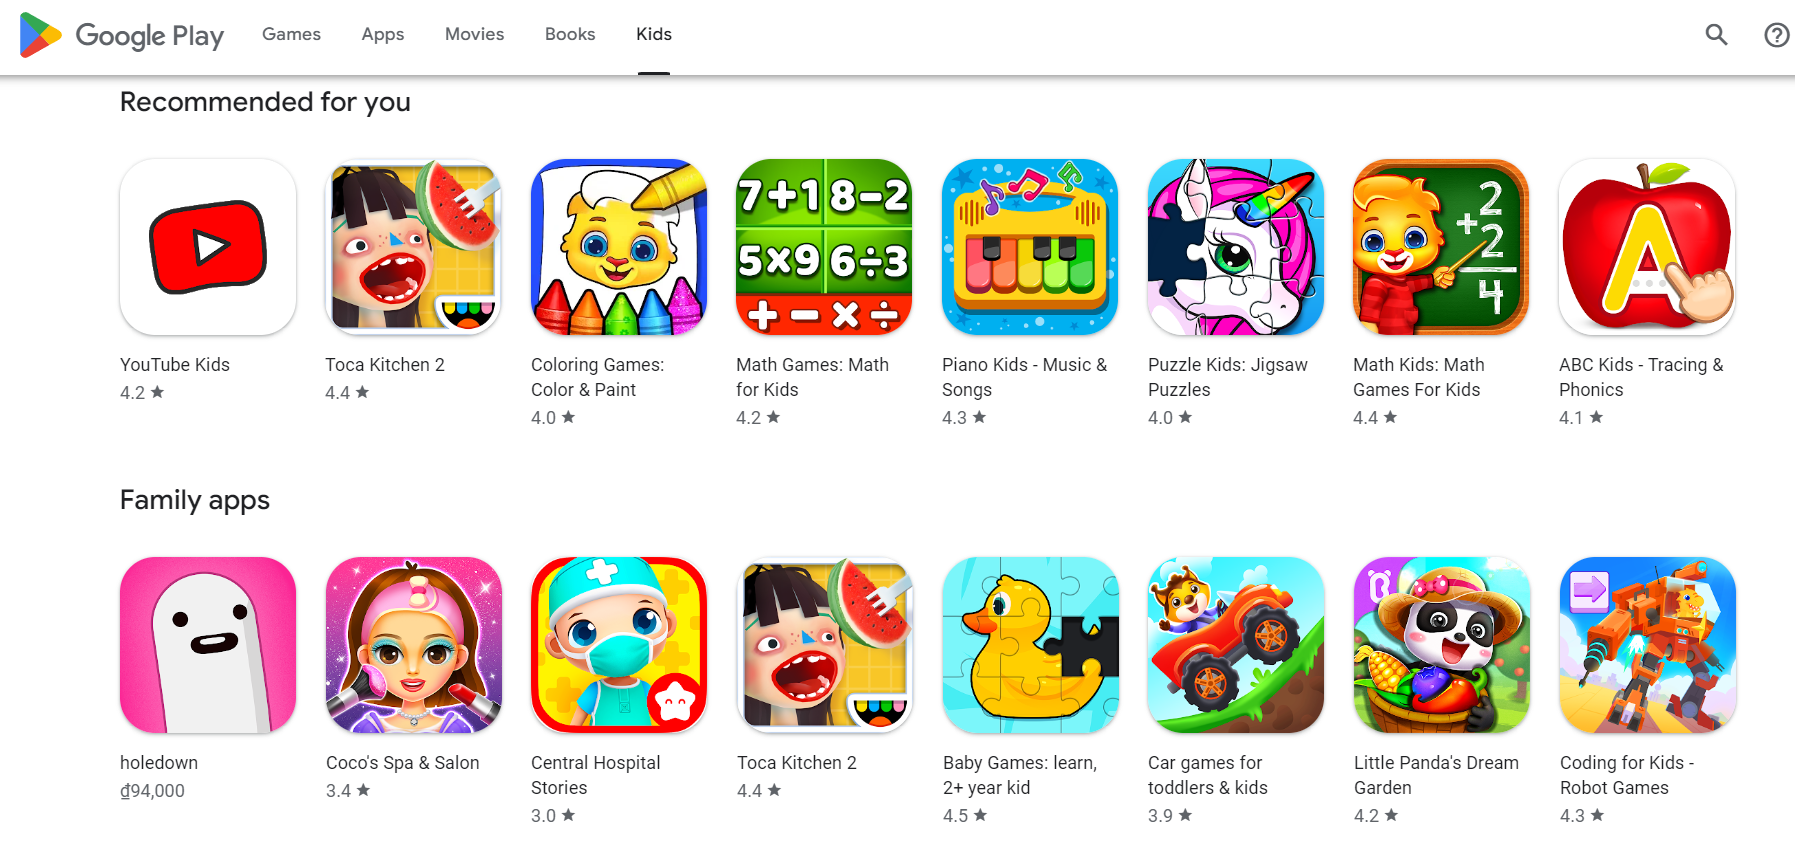](https://play.google.com/store/apps/category/FAMILY?hl=en)

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the `Genres` column:

In [29]:
display_table(free_android, -4)  #Genres

Tools : 8.440532611148726
Entertainment : 6.070864364703228
Education : 5.348679756262695
Business : 4.5926427443015125
Productivity : 3.8930264048747465
Lifestyle : 3.8930264048747465
Finance : 3.7011961182577298
Medical : 3.5206499661475967
Sports : 3.4642292936131795
Personalization : 3.3175355450236967
Communication : 3.238546603475513
Action : 3.1031369893929135
Health & Fitness : 3.080568720379147
Photography : 2.945159106296547
News & Magazines : 2.798465357707064
Social : 2.663055743624464
Travel & Local : 2.324531708417964
Shopping : 2.2455427668697814
Books & Reference : 2.143985556307831
Simulation : 2.0424283457458814
Dating : 1.8618821936357481
Arcade : 1.8505980591288649
Video Players & Editors : 1.7716091175806816
Casual : 1.7490408485669149
Maps & Navigation : 1.399232678853532
Food & Drink : 1.2412547957571656
Puzzle : 1.128413450688332
Racing : 0.9930038366057323
Role Playing : 0.9365831640713158
Libraries & Demo : 0.9365831640713158
Auto & Vehicles : 0.92529902956443

The difference between the `Genres` and the `Category` columns is not crystal clear, but one thing we can notice is that the `Genres` column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the `Category` column moving forward.

<br>Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the `Installs` column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

Below, we calculate the average number of user ratings per app genre on the App Store:

First, we isolate the apps of genre. Then add up the user ratings for apps of that genre. Divide the sum by the number of apps belong to that genre. 

In [64]:
genres_ios = freq_table(free_ios, -5)

for genre in genres_ios:
    total=0
    len_genre=0
    for app in free_ios:
        genre_app = app[-5]
        if genre_app == genre:
            n_rating = float(app[5])
            total += n_rating
            len_genre += 1
    average_ratings = total / len_genre
    print(genre, ': ', average_ratings) 

Social Networking :  71548.34905660378
Photo & Video :  28441.54375
Games :  22788.6696905016
Music :  57326.530303030304
Reference :  74942.11111111111
Health & Fitness :  23298.015384615384
Weather :  52279.892857142855
Utilities :  18684.456790123455
Travel :  28243.8
Shopping :  26919.690476190477
News :  21248.023255813954
Navigation :  86090.33333333333
Lifestyle :  16485.764705882353
Entertainment :  14029.830708661417
Food & Drink :  33333.92307692308
Sports :  23008.898550724636
Book :  39758.5
Finance :  31467.944444444445
Education :  7003.983050847458
Productivity :  21028.410714285714
Business :  7491.117647058823
Catalogs :  4004.0
Medical :  612.0


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:


In [32]:
for app in free_ios:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name app and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold. We could get a better picture by removing these extremely popular apps for each genre and then rework the averages, but we'll leave this level of detail for later.

Reference apps have 74,942 user ratings on average, but it's actually the Bible and Dictionary.com which skew up the average rating:

In [33]:
for app in free_ios:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


However, this niche seems to show some potential. One thing we could do is take another popular book and turn it into an app where we could add different features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes about the book, etc. On top of that, we could also embed a dictionary within the app, so users don't need to exit our app to look up words in an external app.

This idea seems to fit well with the fact that the App Store is dominated by for-fun apps. This suggests the market might be a bit saturated with for-fun apps, which means a practical app might have more of a chance to stand out among the huge number of apps on the App Store.

Other genres that seem popular include weather, book, food and drink, or finance. The book genre seem to overlap a bit with the app idea we described above, but the other genres don't seem too interesting to us:

* Weather apps — people generally don't spend too much time in-app, and the chances of making profit from in-app adds are low. Also, getting reliable live weather data may require us to connect our apps to non-free APIs.

* Food and drink — examples here include Starbucks, Dunkin' Donuts, McDonald's, etc. So making a popular food and drink app requires actual cooking and a delivery service, which is outside the scope of our company.

* Finance apps — these apps involve banking, paying bills, money transfer, etc. Building a finance app requires domain knowledge, and we don't want to hire a finance expert just to build an app.

Now let's analyze the Google Play market a bit.



## Most Popular Apps by Genre on Google Play

For the Google Play market, we actually have data about the number of installs, so we should be able to get a clearer picture about genre popularity. However, the install numbers don't seem precise enough — we can see that most values are open-ended (100+, 1,000+, 5,000+, etc.):

In [34]:
display_table(free_android, 5) # the Installs columns


1,000,000+ : 15.741367637102236
100,000+ : 11.554953735048521
10,000,000+ : 10.516813360415256
10,000+ : 10.200857594222523
1,000+ : 8.395396073121193
100+ : 6.917174452719477
5,000,000+ : 6.838185511171294
500,000+ : 5.574362446400361
50,000+ : 4.773188896411646
5,000+ : 4.513653802753328
10+ : 3.5432182351613632
500+ : 3.2498307379823967
50,000,000+ : 2.2906793048973144
100,000,000+ : 2.1214172872940646
50+ : 1.9183028661701647
5+ : 0.7898894154818324
1+ : 0.5077860528097494
500,000,000+ : 0.2708192281651997
1,000,000,000+ : 0.22568269013766643
0+ : 0.045136538027533285
0 : 0.011284134506883321


One problem with this data is that is not precise. For instance, we don't know whether an app with 100,000+ installs has 100,000 installs, 200,000, or 350,000. However, we don't need very precise data for our purposes — we only want to get an idea which app genres attract the most users, and we don't need perfect precision with respect to the number of users.

We're going to leave the numbers as they are, which means that we'll consider that an app with 100,000+ installs has 100,000 installs, and an app with 1,000,000+ installs has 1,000,000 installs, and so on.

To perform computations, however, we'll need to convert each install number to `float` — this means that we need to remove the commas and the plus characters, otherwise the conversion will fail and raise an error. We'll do this directly in the loop below, where we also compute the average number of installs for each genre (category).

In [35]:
categories_android = freq_table(free_android, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in free_android:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1820673.076923077
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15560965.599534342
FAMILY : 3694276.334922527
MEDICAL : 120616.48717948717
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17805627.643678162
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10682301.033377837
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [36]:
for app in free_android:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we removed all the communication apps that have over 100 million installs, the average would be reduced roughly ten times: (38->3.6m)

In [37]:
under_100_m = []

for app in free_android:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category, which is the runner-up with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).

Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.

The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.

The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.

Let's take a look at some of the apps from this genre and their number of installs:

In [38]:
for app in free_android:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [39]:
for app in free_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):

In [65]:
for app in free_android:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche seems to be dominated by software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps since there'll be some significant competition.

We also notice there are quite a few apps built around the book Quran, which suggests that building an app around a popular book can be profitable. It seems that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets.

However, it looks like the market is already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.

## Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.